In [5]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import cm

from shapely.geometry import MultiPoint
from shapely.geometry import Point, LineString, Polygon
import shapely.wkt

In [53]:
df = pd.read_csv('./bin/Debug/net5.0/Tourist.csv', parse_dates=['DateTime'])
df['CarVelocity_kmh'] = df['CarVelocity'] * 3.6
ids = list(df['ID'].unique())

In [55]:
df2 = df[df['ID'] == ids[2]]
df2.to_csv('tmp.csv', index=False)

<AxesSubplot:xlabel='DateTime'>

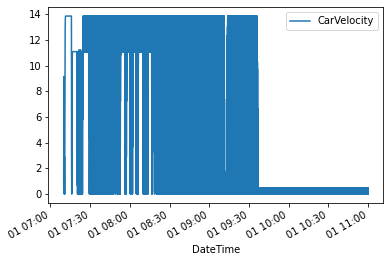

In [60]:
df.plot(x='DateTime', y='CarVelocity')

In [69]:
df2.head(1)

,Tick,Step,DateTime,CarVelocity,CurrentlyCarDriving,ElephantCounter,MyMass,OvertakingActivated,StableId,State,X,Y,ID,CarVelocity_kmh
1801,1801,1801,2019-01-01 07:30:01+01:00,0.73,True,0,0,False,0,Driving,31.241072,-25.02498,53a56d3a-f091-4fd0-a009-5aa38f9986d8,2.628


In [71]:
df2.tail(1)

,Tick,Step,DateTime,CarVelocity,CurrentlyCarDriving,ElephantCounter,MyMass,OvertakingActivated,StableId,State,X,Y,ID,CarVelocity_kmh
93594,14400,14400,2019-01-01 11:00:00+01:00,0.0,True,0,0,False,0,Driving,31.241064,-25.024979,53a56d3a-f091-4fd0-a009-5aa38f9986d8,0.0


<AxesSubplot:>

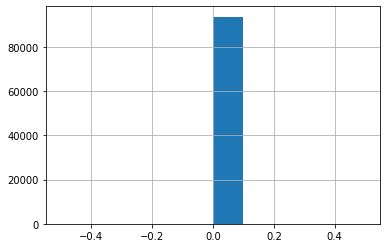

In [9]:
df['ElephantCounter'].hist()

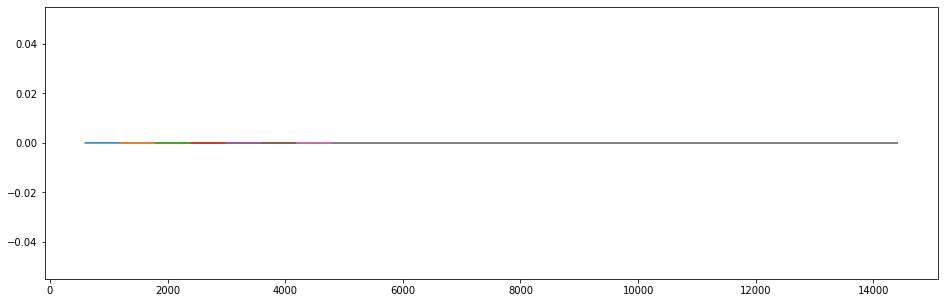

In [10]:
fig, ax = plt.subplots(figsize=(16, 5))

for tid in ids:
    tmp_df = df[df['ID'] == tid]
    ax.plot(tmp_df['Tick'], tmp_df['ElephantCounter'], label=tid)


Text(0, 0.5, 'm/s')

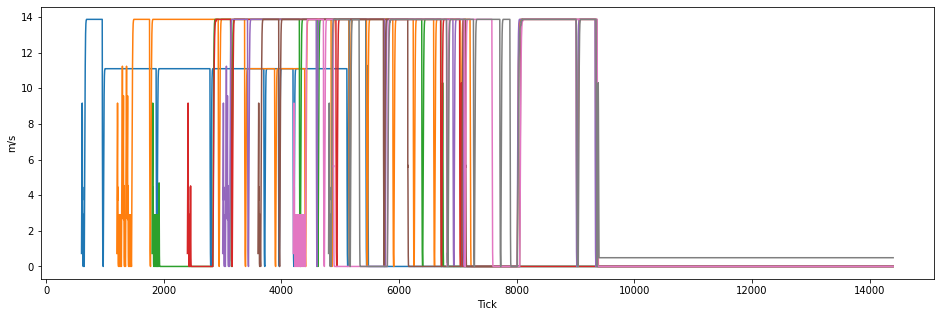

In [11]:
fig, ax = plt.subplots(figsize=(16, 5))



for i in ids:
    df2  = df[df['ID'] == i]
    ax.plot(df2['Tick'], df2['CarVelocity'], label=i)



plt.xlabel('Tick')
plt.ylabel('m/s')


Text(0, 0.5, 'km/h')

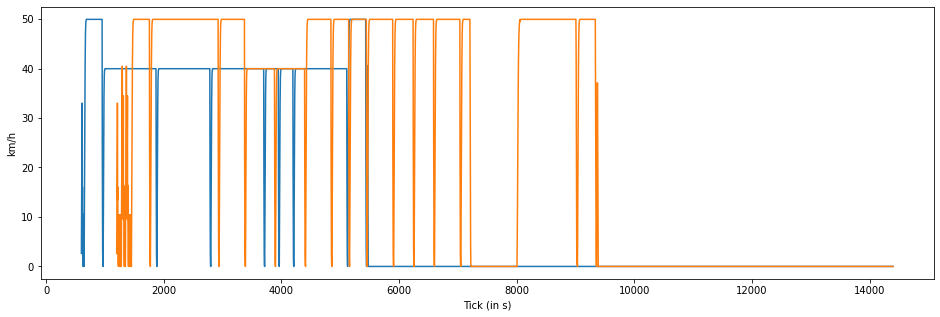

In [12]:
fig, ax = plt.subplots(figsize=(16, 5))



for i in ids[:2]:
    df2  = df[df['ID'] == i]
    ax.plot(df2['Tick'], df2['CarVelocity_kmh'], label=i)



plt.xlabel('Tick (in s)')
plt.ylabel('km/h')

In [13]:
df1 = df[df['ID'] == ids[0]]

In [14]:
def build_LineString(df):

    points = []

    for i, row in df.iterrows():
        points.append(Point(row['X'], row['Y']))

    return LineString(points)

def get_stopped_Points(df):
    points = []

    stopped_df = df[df['CarVelocity'] == 0]

    # group by unique points
    stopped_df = stopped_df.groupby(['X','Y']).size().reset_index().rename(columns={0:'count'})

    for i, row in stopped_df.iterrows():
        points.append(Point(row['X'], row['Y']))

    return points



def get_tourist_summary(df, i):
    df = df[df['ID'] == i]

    start_time =



In [15]:
ls = build_LineString(df1)

In [16]:
df1[df1['CarVelocity'] == 0].head(50)

,Tick,Step,DateTime,CarVelocity,CurrentlyCarDriving,ElephantCounter,MyMass,OvertakingActivated,StableId,State,X,Y,ID,CarVelocity_kmh
30,631,631,2019-01-01T07:10:31.0000000+01:00,0.0,True,0,0,False,0,Driving,31.242040,-25.024906,0e3b8670-c5f4-46bf-ac92-ec65fde8d92d,0.0
46,647,647,2019-01-01T07:10:47.0000000+01:00,0.0,True,0,0,False,0,Driving,31.242160,-25.024804,0e3b8670-c5f4-46bf-ac92-ec65fde8d92d,0.0
369,970,970,2019-01-01T07:16:10.0000000+01:00,0.0,True,0,0,False,0,Driving,31.280703,-25.030703,0e3b8670-c5f4-46bf-ac92-ec65fde8d92d,0.0
2052,1885,1885,2019-01-01T07:31:25.0000000+01:00,0.0,True,0,0,False,0,Driving,31.231887,-25.102756,0e3b8670-c5f4-46bf-ac92-ec65fde8d92d,0.0
5200,2801,2801,2019-01-01T07:46:41.0000000+01:00,0.0,True,0,0,False,0,Driving,31.280712,-25.030730,0e3b8670-c5f4-46bf-ac92-ec65fde8d92d,0.0
9696,3717,3717,2019-01-01T08:01:57.0000000+01:00,0.0,True,0,0,False,0,Driving,31.231887,-25.102756,0e3b8670-c5f4-46bf-ac92-ec65fde8d92d,0.0
11184,3965,3965,2019-01-01T08:06:05.0000000+01:00,0.0,True,0,0,False,0,Driving,31.213533,-25.113976,0e3b8670-c5f4-46bf-ac92-ec65fde8d92d,0.0
12684,4213,4213,2019-01-01T08:10:13.0000000+01:00,0.0,True,0,0,False,0,Driving,31.231847,-25.102777,0e3b8670-c5f4-46bf-ac92-ec65fde8d92d,0.0
19417,5128,5128,2019-01-01T08:25:28.0000000+01:00,0.0,True,0,0,False,0,Driving,31.280712,-25.030730,0e3b8670-c5f4-46bf-ac92-ec65fde8d92d,0.0
22001,5451,5451,2019-01-01T08:30:51.0000000+01:00,0.0,True,0,0,False,0,Driving,31.242189,-25.024782,0e3b8670-c5f4-46bf-ac92-ec65fde8d92d,0.0


In [17]:
print(ls.wkt)

LINESTRING (31.2410715061272 -25.02498038870507, 31.24108569893985 -25.02498296258834, 31.24110698815993 -25.0249868234107, 31.24113536406769 -25.0249919694062, 31.24117082666491 -25.02499840057083, 31.2412133662327 -25.02500611513657, 31.24126296333151 -25.02501510957157, 31.24131950131111 -25.02502536271378, 31.2413763647578 -25.02505419779703, 31.24143917763337 -25.02508535387841, 31.2415078431088 -25.02511941288445, 31.24158380441751 -25.02512172884381, 31.24167317446523 -25.02510643404165, 31.24175793668415 -25.02509192777106, 31.24182964982921 -25.02505562521972, 31.2418618169575 -25.02503931690951, 31.24189824937785 -25.02502084613884, 31.24193502191367 -25.02499334642819, 31.24196619593682 -25.02496717057885, 31.24199192340381 -25.02494556801855, 31.24201005915378 -25.02493033998159, 31.24202231205368 -25.02492005159129, 31.24202998374961 -25.02491360989834, 31.24203450677754 -25.02490981204697, 31.2420370373461 -25.02490768720401, 31.24203834626084 -25.02490658814729, 31.24203

In [18]:
stop_points = get_stopped_Points(df1)

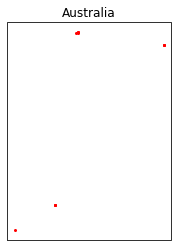

In [19]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Australia')
#ax.set_extent([112, 154, -44, -5.6], ccrs.PlateCarree())
ax.coastlines(resolution='110m')

for p in stop_points:
    plt.plot(p.x, p.y,  markersize=2, marker='o', color='red')

#plt.plot(145.014659, -37.785922,  markersize=2, marker='o', color='red')
#plt.savefig('map.png')
plt.show()

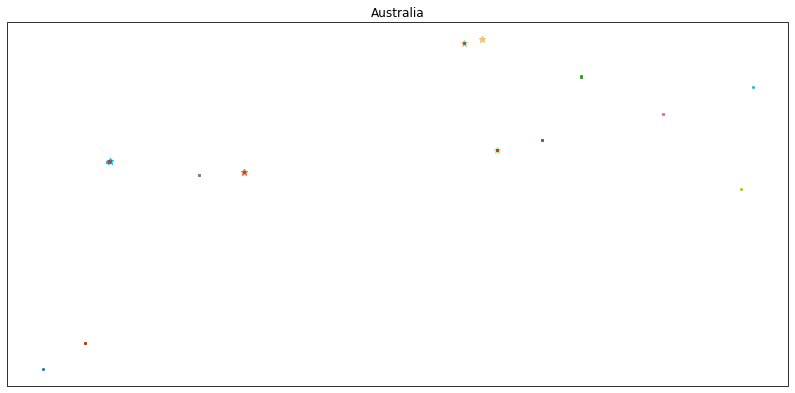

In [20]:
color=iter(cm.rainbow(np.linspace(0,1, len(ids))))

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Australia')
#ax.set_extent([112, 154, -44, -5.6], ccrs.PlateCarree())
ax.coastlines(resolution='110m')


#ax.project_linear(ls)

ax.add_geometries([ls], ccrs.PlateCarree())

for i in ids:
    dfx = df[df['ID'] == i]
    c=next(color)

    # stopped for animals
    dfx_looking = dfx[dfx['State'] == 'Looking']

    # stopped in traffic
    dfx_driving = dfx[dfx['State'] == 'Driving']


    for p in get_stopped_Points(dfx_looking):
        plt.plot(p.x, p.y,  markersize=7, marker='*', color=c)


    for p in get_stopped_Points(dfx_driving):
        plt.plot(p.x, p.y,  markersize=2, marker='o')


#plt.plot(145.014659, -37.785922,  markersize=2, marker='o', color='red')
#plt.savefig('map.png')
plt.show()



In [50]:
from ipyleaflet import Map, GeoJSON, AwesomeIcon, Marker, LayersControl, LayerGroup, FullScreenControl
from ipywidgets import HTML
import json

m = Map(center=(-25.134554807559418, 31.432526560679484), zoom=10, scroll_wheel_zoom=True)

# load street graph
with open('knp_graph_streets.geojson', 'r') as f:
    knp_graph = json.load(f)

geo_json = GeoJSON(
    name='Steets',
    data=knp_graph,
    #style={
    #    'opacity': 1, 'dashArray': '9', 'fillOpacity': 0.1, 'weight': 1
    #}
)
m.add_layer(geo_json)

# stop icon
icon_stopped = AwesomeIcon(
    name='car',
    marker_color='red',
    icon_color='black',
    spin=False
)

icon_looking = AwesomeIcon(
    name='eye',
    marker_color='green',
    icon_color='black',
    spin=False
)

# load all tourists
for i in ids:
    dfx = df[df['ID'] == i]

    layer_group = LayerGroup(name=i)

    # stopped for animals
    dfx_looking = dfx[dfx['State'] == 'Looking']

    # stopped in traffic
    dfx_driving = dfx[dfx['State'] == 'Driving']

    for p in get_stopped_Points(dfx_driving):
        #plt.plot(p.x, p.y,  markersize=2, marker='o')
        message = HTML()
        message.value="Tourist-ID: {}".format(i)
        marker =  Marker(icon=icon_stopped, location=(p.y, p.x), draggable=False, popup=message)
        #m.add_layer(marker)
        layer_group.add_layer(marker)

    for p in get_stopped_Points(dfx_looking):
        message = HTML()
        message.value="Tourist-ID: {}".format(i)
        marker =  Marker(icon=icon_looking, location=(p.y, p.x), draggable=False, popup=message)
        layer_group.add_layer(marker)

    m.add_layer(layer_group)



control = LayersControl(position='topright')
m.add_control(control)
m.add_control(FullScreenControl())

m

Map(center=[-25.134554807559418, 31.432526560679484], controls=(ZoomControl(options=['position', 'zoom_in_text…